In [282]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [283]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [284]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [285]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [286]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
)

In [287]:
bitcoin_news["articles"][0]
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news["articles"])
bitcoin_df.head(2)
bitcoin_df.to_pickle("btc_df.pkl")
btc_df = pd.read_pickle("btc_df.pkl")
btc_df.head(2)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,"Bitcoin is also having a very, very bad day",Bitcoin is going through a remarkably bad day....,http://techcrunch.com/2020/03/12/bitcoin-is-al...,https://techcrunch.com/wp-content/uploads/2019...,2020-03-12T12:34:45Z,Bitcoin is going through a remarkably bad day....
1,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,HTC's Exodus 5G router can be a Bitcoin node,After launching two cryptocurrency-oriented sm...,https://mashable.com/article/htc-exodus-5g-hub/,https://mondrian.mashable.com/2020%252F03%252F...,2020-03-04T13:00:00Z,After launching two cryptocurrency-oriented sm...


In [288]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum AND eth", language="en", sort_by="relevancy"
)

In [289]:
ethereum_news["articles"][0]
ethereum_df = pd.DataFrame.from_dict(ethereum_news["articles"])
ethereum_df.to_pickle("eth_df.pkl")
eth_df = pd.read_pickle("eth_df.pkl")
eth_df.head(5)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Decrypt.co'}",Will Heasman,Viral research firm 'Folding at Home' has 400K...,Viral research firm Folding@home has revealed ...,https://decrypt.co/23064/folding-at-home-now-h...,https://cdn.decrypt.co/wp-content/uploads/2020...,2020-03-20T15:27:38Z,Hundreds of thousands of PC owners are donatin...
1,"{'id': None, 'name': 'Coindesk.com'}",Paddy Baker,"Coinbase Wallet Adds Short, Customizable Addre...",The new support also includes an integration w...,https://www.coindesk.com/coinbase-wallet-adds-...,https://www.coindesk.com/wp-content/uploads/20...,2020-02-26T12:23:32Z,Coinbase Wallet users can now send cryptocurre...
2,"{'id': None, 'name': 'Coindesk.com'}",Brady Dale,Ethereum’s ProgPoW Debate Is About Much More T...,The debate over ProgPoW has become a flashpoin...,https://www.coindesk.com/ethereums-progpow-deb...,https://www.coindesk.com/wp-content/uploads/20...,2020-03-05T22:30:06Z,What do we talk about when we talk about progr...
3,"{'id': None, 'name': 'Yahoo.com'}",Aislinn Keely,"Daily transaction fees on Ethereum hit $564,00...",The total number of ethereum transaction fees ...,https://finance.yahoo.com/news/daily-transacti...,https://s.yimg.com/ny/api/res/1.2/FDgTEe5BL3A6...,2020-03-13T18:58:44Z,Thursday's ethereum network congestion perhaps...
4,"{'id': None, 'name': 'Seekingalpha.com'}",Vincenzo Furcillo,The Present And Future Of The Ethereum Network,The adoption and the development of applicatio...,https://seekingalpha.com/article/4330385-prese...,https://static.seekingalpha.com/uploads/2020/3...,2020-03-06T22:13:57Z,Introduction\r\nStill living in the shade of B...


In [290]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiment = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text,
            "Date": date
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame

bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text,Date
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,2020-03-12
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,2020-03-04
2,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...,2020-03-04
3,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,2020-03-19
4,0.4939,0.000,0.915,0.085,Former Coinbase chief legal officer Brian Broo...,2020-03-16


In [291]:
# Create the ethereum sentiment scores DataFrame

ethereum_sentiment = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text,
            "Date": date
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame

ethereum_sentiment_df = pd.DataFrame(ethereum_sentiment)
ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text,Date
0,0.3400,0.058,0.830,0.112,Hundreds of thousands of PC owners are donatin...,2020-03-20
1,0.7003,0.000,0.837,0.163,Coinbase Wallet users can now send cryptocurre...,2020-02-26
2,0.4019,0.000,0.937,0.063,What do we talk about when we talk about progr...,2020-03-05
3,-0.2023,0.067,0.860,0.072,Thursday's ethereum network congestion perhaps...,2020-03-13
4,0.0000,0.000,1.000,0.000,Introduction\r\nStill living in the shade of B...,2020-03-06


In [292]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.379747,0.020632,0.901474,0.077895
std,0.341745,0.043071,0.055929,0.031936
min,-0.510600,0.000000,0.730000,0.000000
25%,0.267050,0.000000,0.871000,0.067000
50%,0.507000,0.000000,0.932000,0.068000
75%,0.507000,0.021000,0.932000,0.079500
max,0.789300,0.168000,1.000000,0.137000


In [293]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.162440,0.024750,0.917000,0.058200
std,0.399961,0.044129,0.053829,0.050475
min,-0.670500,0.000000,0.830000,0.000000
25%,-0.000450,0.000000,0.869750,0.000000
50%,0.214300,0.000000,0.921000,0.055500
75%,0.416125,0.050500,0.953000,0.082000
max,0.757900,0.153000,1.000000,0.163000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin 

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [294]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [295]:
lemmatizer = WordNetLemmatizer()

In [296]:
# Expand the default stopwords list if necessary

stop = set(stopwords.words('english'))

In [297]:
# Complete the tokenizer function

def tokenizer(text):
    #"""Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    tokens = list(filter(lambda t: t.lower() not in stop, words))

    return tokens


In [298]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['Tokens'] = bitcoin_sentiment_df.Text.apply(tokenizer)
bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text,Date,Tokens
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,2020-03-12,"[Bitcoin, going, remarkably, bad, day, turns, ..."
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,2020-03-04,"[launching, two, cryptocurrency-oriented, smar..."
2,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...,2020-03-04,"[Indias, Supreme, Court, Wednesday, overturned..."
3,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,2020-03-19,"[robot, colleague, Satoshi, Nakaboto, writes, ..."
4,0.4939,0.000,0.915,0.085,Former Coinbase chief legal officer Brian Broo...,2020-03-16,"[Former, Coinbase, chief, legal, officer, Bria..."


In [299]:
# Create a new tokens column for ethereum
ethereum_sentiment_df['Tokens'] = ethereum_sentiment_df.Text.apply(tokenizer)
ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text,Date,Tokens
0,0.3400,0.058,0.830,0.112,Hundreds of thousands of PC owners are donatin...,2020-03-20,"[Hundreds, thousands, PC, owners, donating, CP..."
1,0.7003,0.000,0.837,0.163,Coinbase Wallet users can now send cryptocurre...,2020-02-26,"[Coinbase, Wallet, users, send, cryptocurrenci..."
2,0.4019,0.000,0.937,0.063,What do we talk about when we talk about progr...,2020-03-05,"[talk, talk, progressive, proof-of-work, ProgP..."
3,-0.2023,0.067,0.860,0.072,Thursday's ethereum network congestion perhaps...,2020-03-13,"[Thursday, 's, ethereum, network, congestion, ..."
4,0.0000,0.000,1.000,0.000,Introduction\r\nStill living in the shade of B...,2020-03-06,"[Introduction, Still, living, shade, Bitcoin, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [300]:
from collections import Counter
from nltk import ngrams

In [301]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_sentiment_df.Text.str.cat()), N)
Counter(grams).most_common(10)

[(('Satoshi', 'Nakaboto'), 28),
 (('chars', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'Satoshi'), 14),
 (('Nakaboto', 'writes'), 14),
 (('writes', 'Bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'day'), 14),
 (('day', 'Welcome'), 14),
 (('Welcome', 'another'), 14)]

In [302]:
# Generate the Ethereum N-grams where N=2
grams2 = ngrams(tokenizer(ethereum_sentiment_df.Text.str.cat()), N)
Counter(grams2).most_common(10)

[(('Coinbase', 'Wallet'), 3),
 (('users', 'send'), 3),
 (('chars', 'Coinbase'), 2),
 (('short', 'human-friendly'), 2),
 (('human-friendly', 'addresses'), 2),
 (('Ethereum', 'Name'), 2),
 (('Name', 'Service'), 2),
 (('mining', 'algorithm'), 2),
 (('ethereum', 'network'), 2),
 (('second', 'place'), 2)]

In [303]:
# Use the token_count function to generate the top 10 words from each coin
#def token_count(tokens, N=10):
   # """Returns the top N tokens from the frequency count"""
    #return Counter(tokens).most_common(N)

def token_counter(tokens): 
    # Combine all words into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Words', 'Count'])

In [304]:
# Get the top 10 words for Bitcoin
btc_words = bitcoin_sentiment_df['Text']
token_counter(btc_words)

,Words,Count
0,Bitcoin,44
1,Satoshi,28
2,Nakaboto,28
3,chars,19
4,going,15
5,day,15
6,hours,15
7,BTC,15
8,robot,14
9,colleague,14


In [305]:
# Get the top 10 words for Ethereum
eth_words = ethereum_sentiment_df['Text']
token_counter(eth_words)

,Words,Count
0,chars,20
1,Ethereum,12
2,ETH,9
3,Coinbase,4
4,ProgPoW,4
5,mining,4
6,Wallet,3
7,users,3
8,send,3
9,addresses,3


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [306]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [307]:
btc_tokens = str(bitcoin_sentiment_df['Tokens'])

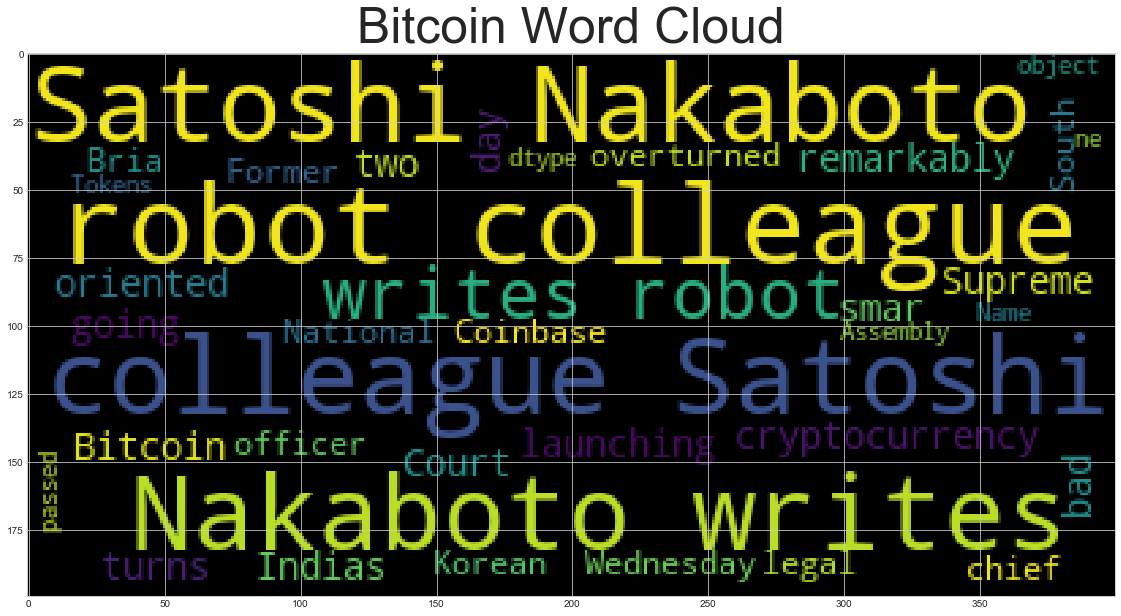

In [308]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_tokens)
plt.title('Bitcoin Word Cloud',fontsize=50)
plt.imshow(btc_wc)


In [309]:
eth_tokens = str(ethereum_sentiment_df['Tokens'])

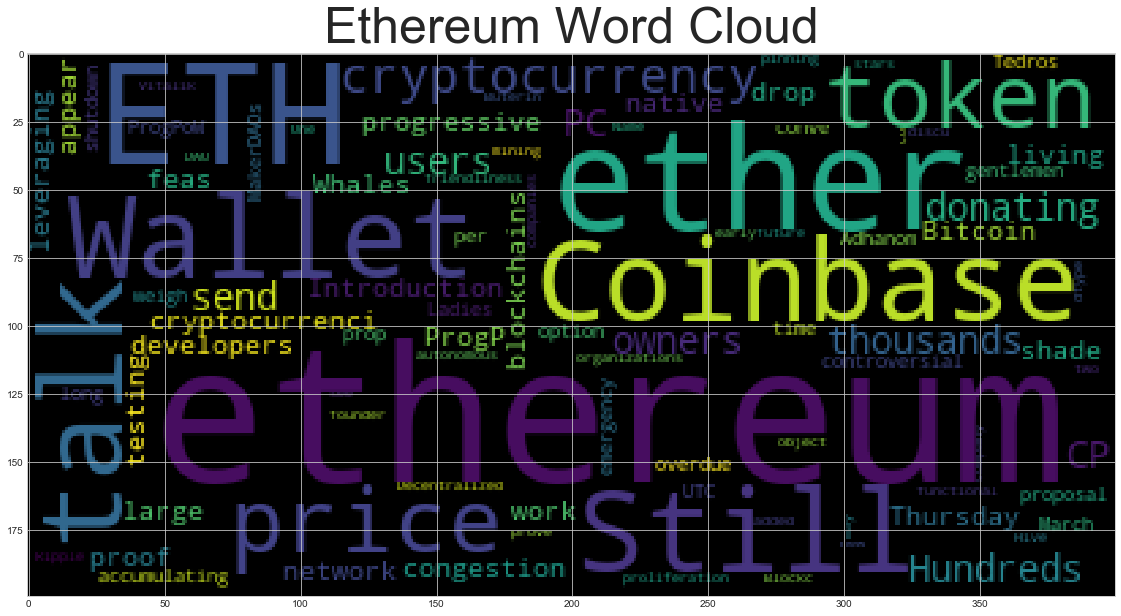

In [310]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_tokens)
plt.title('Ethereum Word Cloud',fontsize=50)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [311]:
import spacy
from spacy import displacy

In [312]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [313]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [314]:
# Concatenate all of the bitcoin text together
btc_all = bitcoin_sentiment_df['Text'].str.cat()
btc_all

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars]Indias Supreme Court on Wednesday overturned\xa0central banks two-year-old ban on cryptocurrency trading in the country in what many said was a historic verdict.\r\nThe Reserve Bank of India had imposed a ban on cryptocurrency trading in April 2018 that barred ban… [+1336 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what

In [315]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_all)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [316]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [317]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Descartes PERSON
Brian Brooks PERSON
first ORDINAL
the Office of the Comptroller of the Currency ORG
April 1, 2020 DATE
Brooks ORG
OCC ORG
chars]The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Sato

## Ethereum NER

In [318]:
# Concatenate all of the bitcoin text together
eth_all = ethereum_sentiment_df['Text'].str.cat()
eth_all

'Hundreds of thousands of PC owners are donating their CPU power to help fight the coronavirus. Within a Reddit AMA last night, Folding at Homea distributed computing project tasked with developing therapies for diseasenoted a 1,200% increase in volunteers sin… [+2024 chars]Coinbase Wallet users can now send cryptocurrencies to "short human-friendly addresses," as well as ones creating using the Ethereum Name Service (ENS).\r\nProduct lead Sid Coelho-Prabhu announced Tuesday that Coinbase Wallet now supports customizable walle use… [+1596 chars]What do we talk about when we talk about progressive proof-of-work (ProgPoW) on Ethereum?\r\nOn the surface, ProgPoW is a proposed update to the mining algorithm of the worlds second-largest blockchain by market cap that would theoretically favor less well-reso… [+16951 chars]Thursday\'s ethereum network congestion perhaps unsurprisingly resulted in a significant uptick in the total number of fee payments during a 24-hour period.\r\nAccording to

In [319]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_all)
# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"


In [320]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [321]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Hundreds of thousands CARDINAL
Homea ORG
1,200% PERCENT
the Ethereum Name Service ORG
Sid Coelho-Prabhu PERSON
Tuesday DATE
Coinbase Wallet PERSON
ProgPoW PRODUCT
second ORDINAL
chars]Thursday GPE
roughly $564,000 MONEY
ETH ORG
Bitcoin GPE
Ether PERSON
second ORDINAL
second ORDINAL
3.0 CARDINAL
Last weekend DATE
ETH ORG
Ethereum PERSON
ETH ORG
$100 mark MONEY
late Thursday DATE
TradingView ORG
ETH ORG
90 MONEY
Coinbase ORG
89.96 MONEY
Bitfinex GPE
88.20 MONEY
Bitstamp ORG
86.62 MONEY
Gemini GPE
ETH ORG
100 CARDINAL
25% PERCENT
blockchain GPE
ETH ORG
Ethereums ORG
Fridays DATE
James Hancock PERSON
ProgPoW PRODUCT
I Will Teach LOC
bitcoin GPE
20 MONEY
$4 million MONEY
dai ORG
March 11 DATE
4:56 p.m. TIME
Tedros Adhanom Ghebreyesus ORG
the World Health Organization ORG
Gitcoin PERSON
at least $50,000 MONEY
Hive Blockchain Technologies ORG
two CARDINAL
ETH ORG
GPU ORG
Sweden GPE
more than 20% PERCENT
Hive PERSON
Ethereums PERSON
North America LOC
ETHDenver PRODUCT
Dapper Labs ORG
roughly $